In [1]:
import pandas as pd
import numpy as np

attacks = pd.read_csv('attacks.csv', encoding='latin-1')

#General df overview:
attacks.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [2]:
#Checking the data types and general DF overview.
attacks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [3]:
#There are redundant and non-informative columns. Getting rid of those before executing a dropna.
attacks.drop(['Case Number', 'Year', 'Case Number.1', 'Case Number.2', 'Unnamed: 22', 'Unnamed: 23', 'href formula', 'pdf', 'href'], axis=1, inplace=True)
attacks.dropna(axis=0,how='all',thresh=3,subset=None,inplace=True)

#Dropping the duplicate rows, just in case.
attacks.drop_duplicates(subset=None, keep="first", inplace=True)

#Since 'original order' is in rough chronological order, we'll set it as index.  
attacks.sort_values(by=['original order'],ignore_index=True, inplace=True)

#Dropping the column after its served its purpose.
attacks.drop(['original order'], axis=1, inplace=True)

In [4]:
#Let's see if everything's in order.

attacks.head()

,Date,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,1845-1853,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,NaN,NaN,S.W. Baker
1,1883-1889,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938"
2,1900-1905,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF"
3,Before 1903,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234"
4,Before 1903,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234"


In [5]:
#Replacing the missing values with 'Unknown'.
attacks = attacks.replace({np.NaN: "Unknown"})

attacks.head()

,Date,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,1845-1853,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,Unknown,Unknown,S.W. Baker
1,1883-1889,Unprovoked,PANAMA,Unknown,"Panama Bay 8ºN, 79ºW",Unknown,Jules Patterson,M,Unknown,FATAL,Y,Unknown,Unknown,"The Sun, 10/20/1938"
2,1900-1905,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,Unknown,FATAL,Y,Unknown,Unknown,"F. Schwartz, p.23; C. Creswell, GSAF"
3,Before 1903,Unprovoked,AUSTRALIA,Western Australia,Unknown,Pearl diving,Ahmun,M,Unknown,FATAL,Y,Unknown,Unknown,"H. Taunton; N. Bartlett, pp. 233-234"
4,Before 1903,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,Unknown,FATAL,Y,Unknown,Unknown,"H. Taunton; N. Bartlett, p. 234"


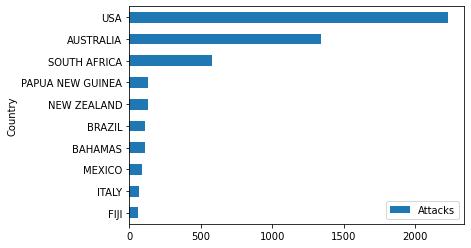

In [10]:
#Creating a new dataset to show attacks by country and apply some basic plotting.

countries = attacks.groupby('Country', axis=0).count() #Counting the attacks by country.
countries = countries.rename(columns={'Date': 'Attacks'})
countries.drop(labels=['Type', 'Area', 'Location', 'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species ', 'Investigator or Source'], axis=1, inplace=True)

#Plotting the top 10 countries by number of attacks.
countries.sort_values('Attacks',axis=0, ascending=False, inplace=True)
countries.head(10).sort_values('Attacks').plot(kind='barh')

In [7]:
#Now that we're done, let's export the csv with a new name.

attacks.to_csv('attacks_clean.csv')